In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop('customerID', axis = 1)

In [9]:
(df['TotalCharges'].eq(' ')).any()

True

In [10]:
df['TotalCharges'].str.contains(' ').sum()

11

In [11]:
df['TotalCharges'] = df['TotalCharges'].str.replace(" ", "0.0")

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df['TotalCharges'].mean()

2279.7343035638223

In [14]:
df['TotalCharges'] = df['TotalCharges'].replace(0.0, df['TotalCharges'].mean())

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

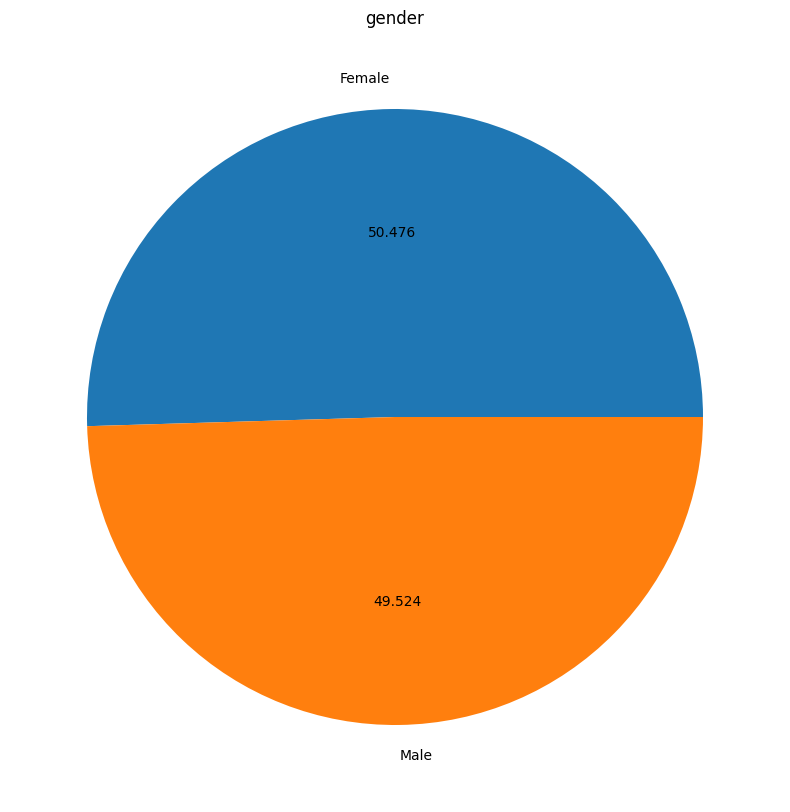

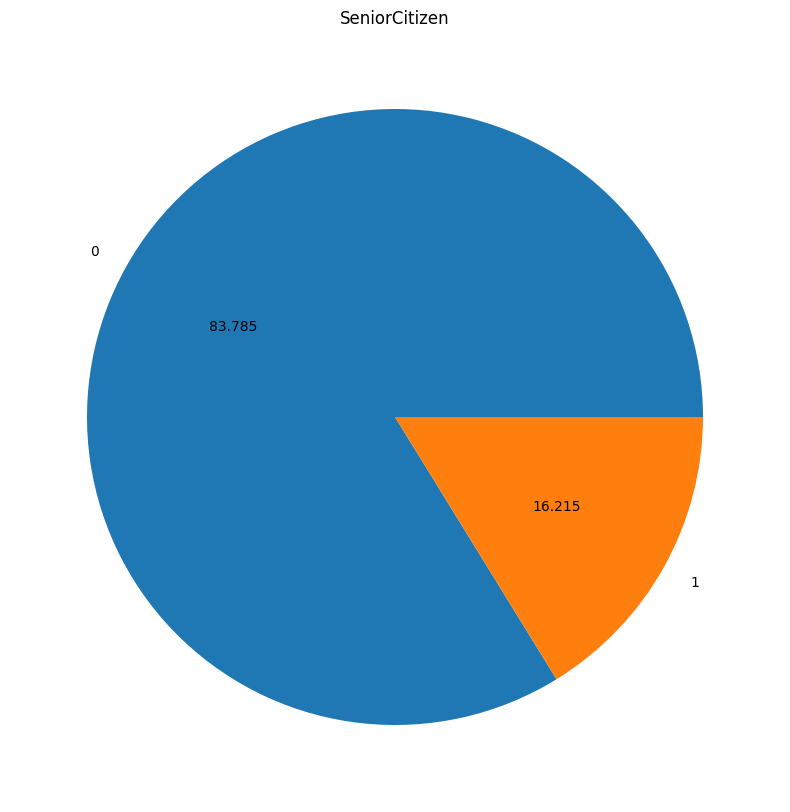

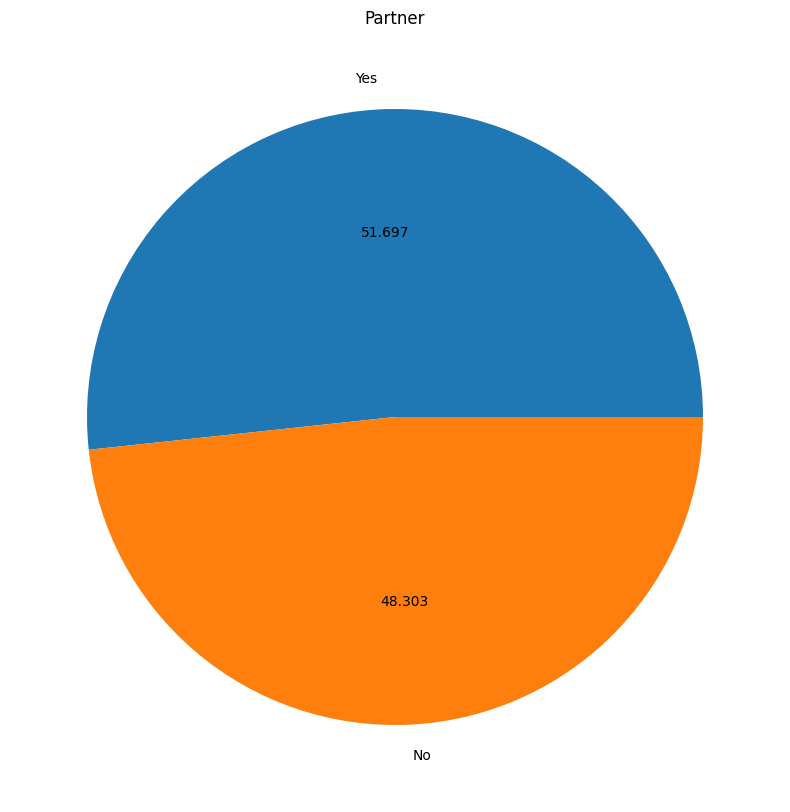

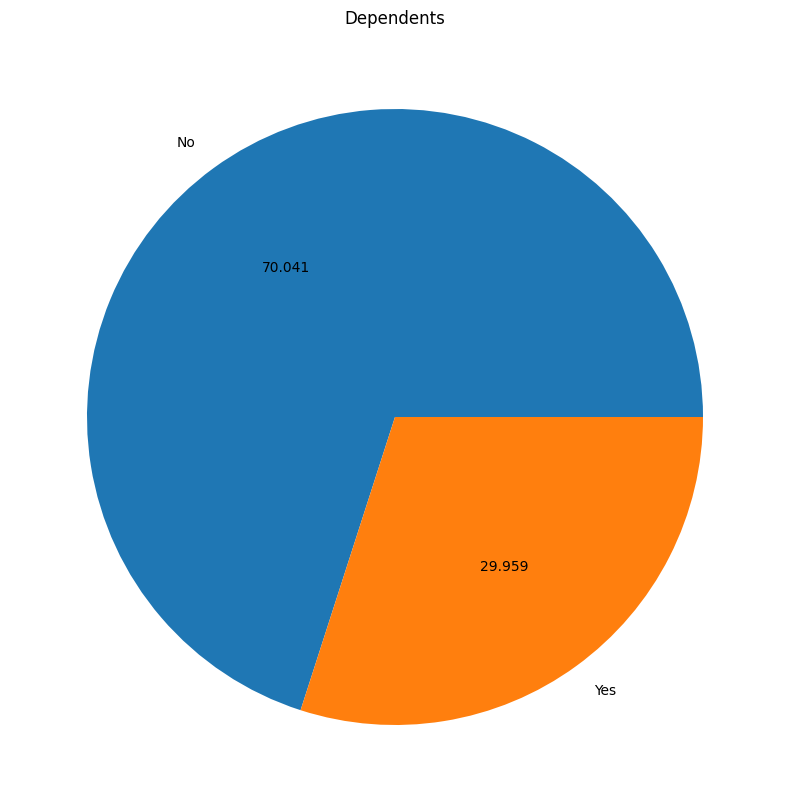

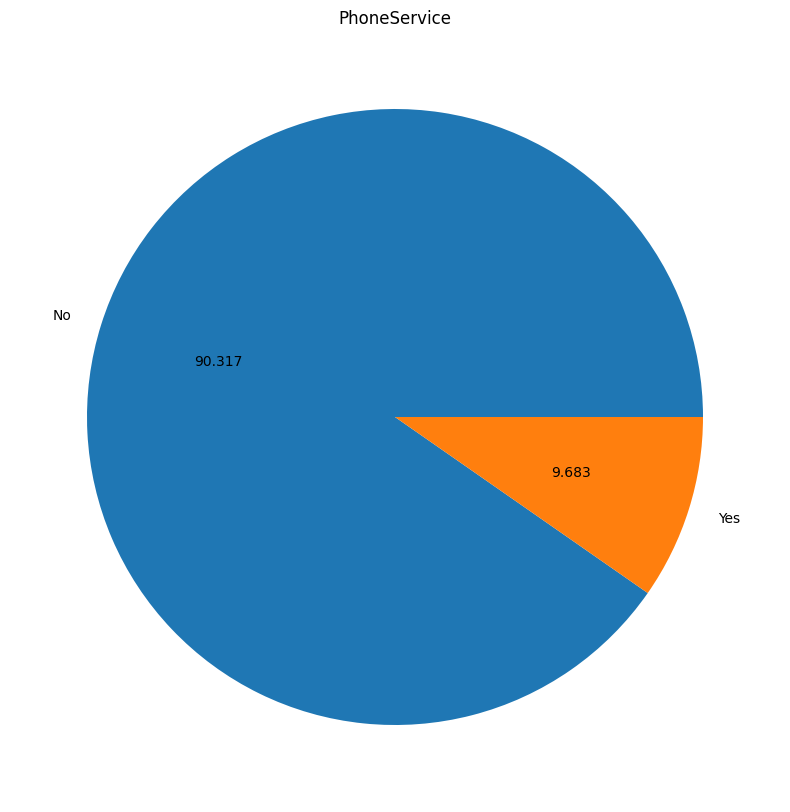

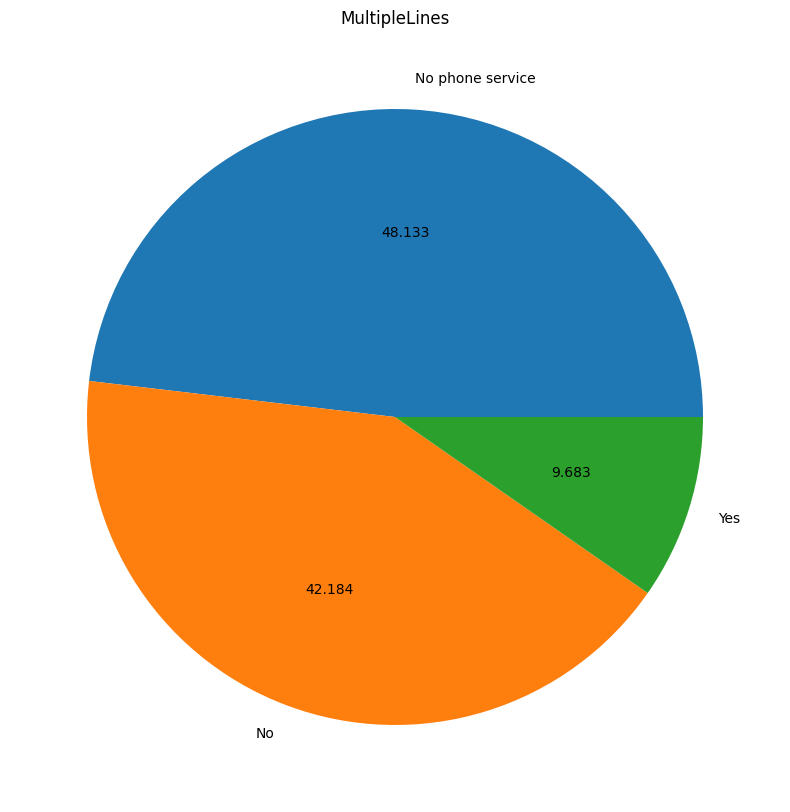

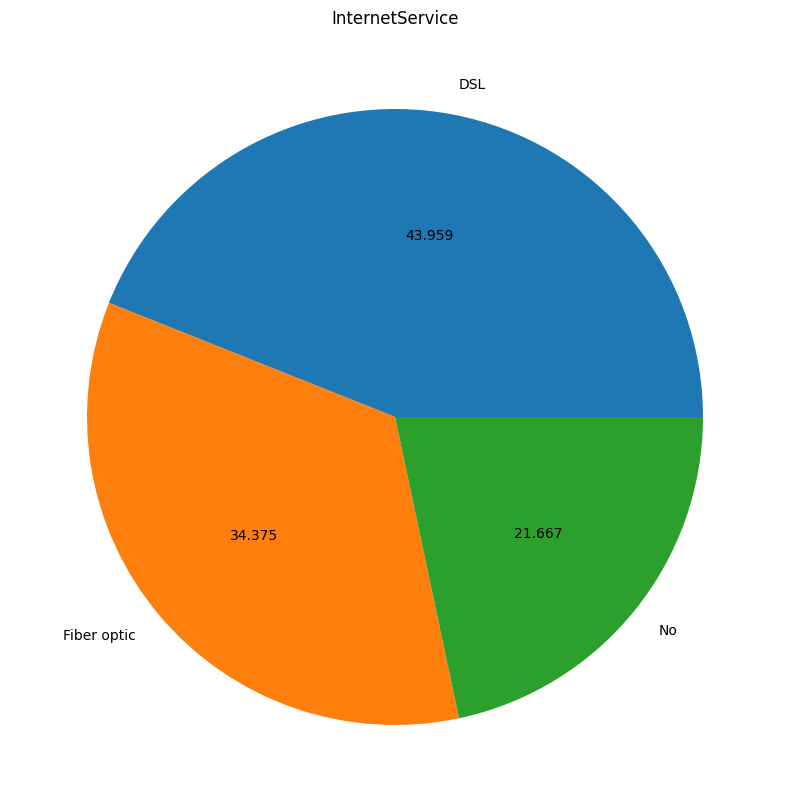

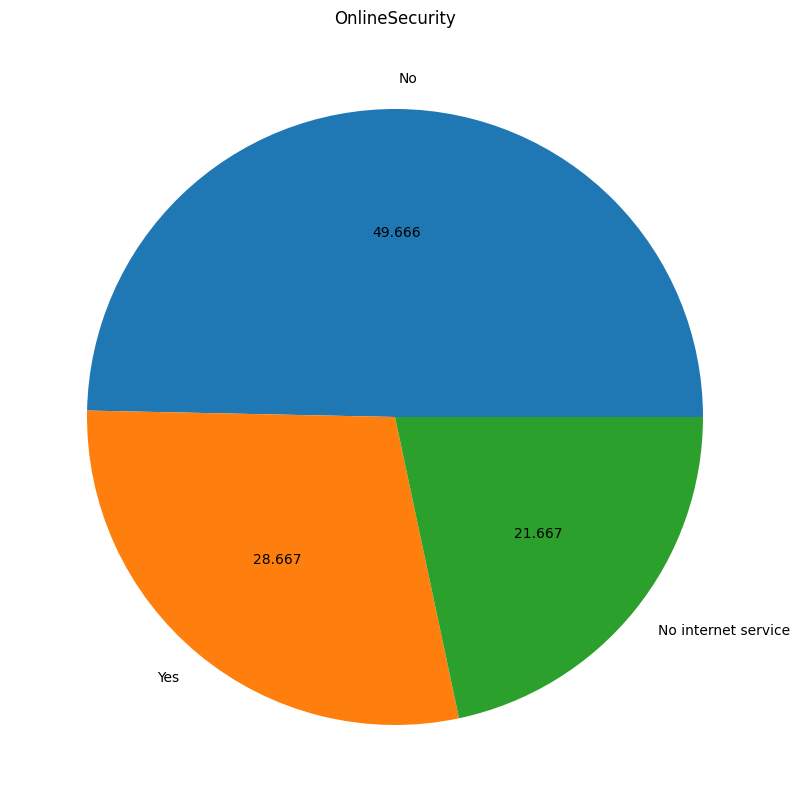

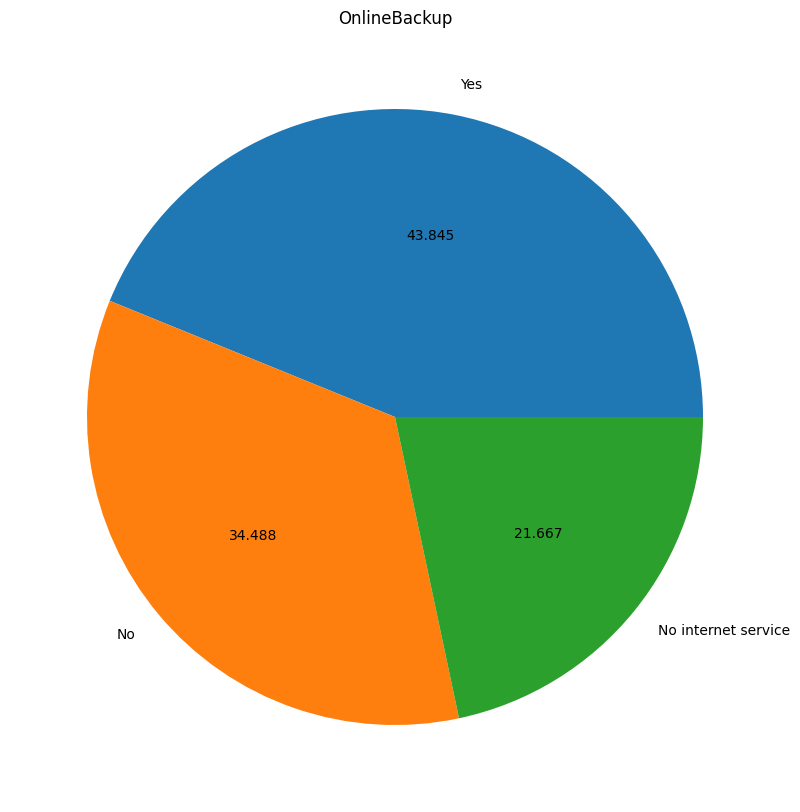

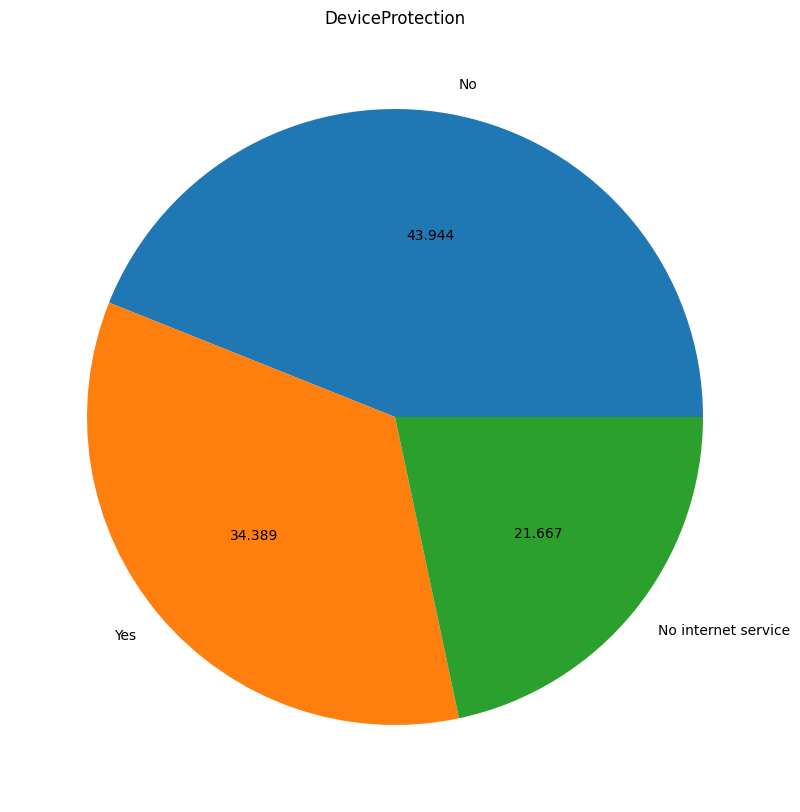

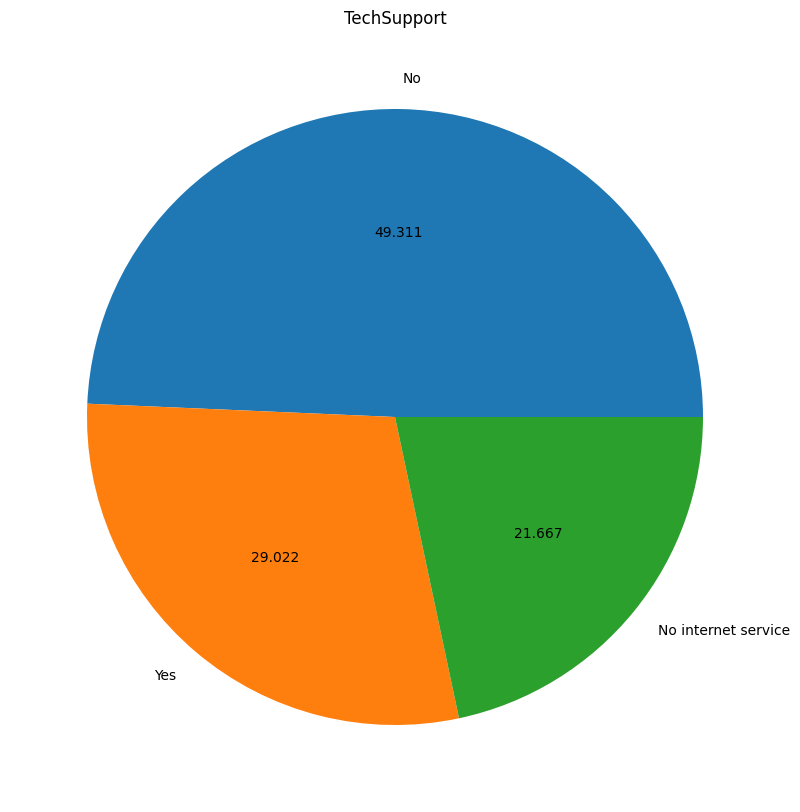

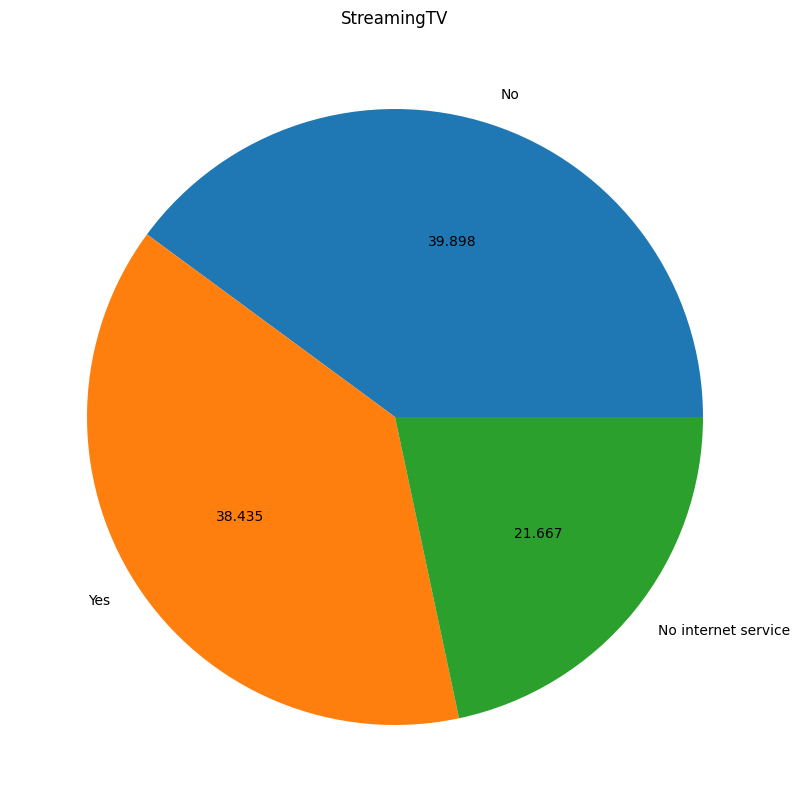

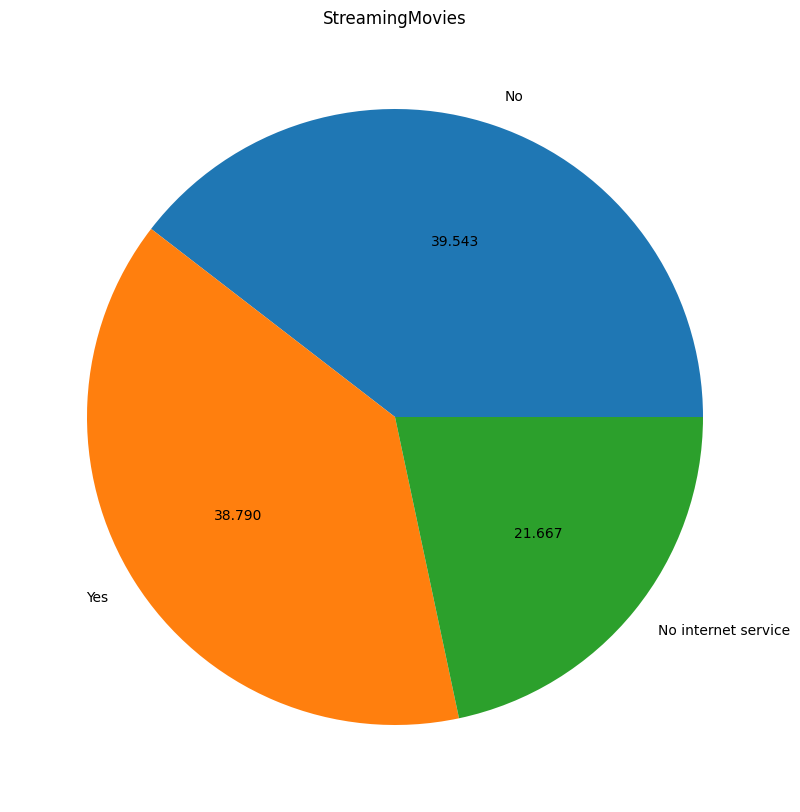

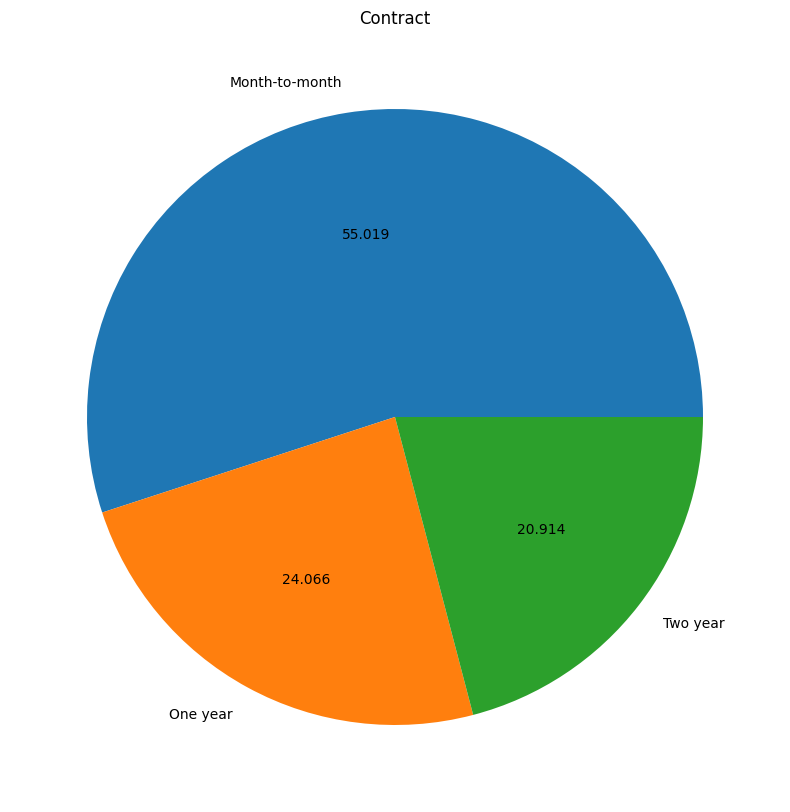

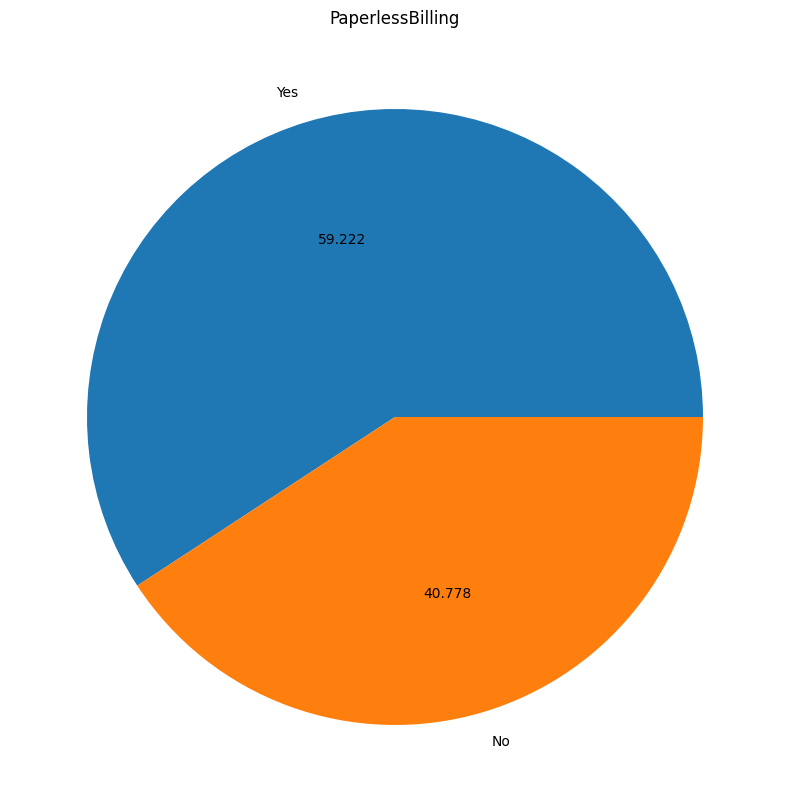

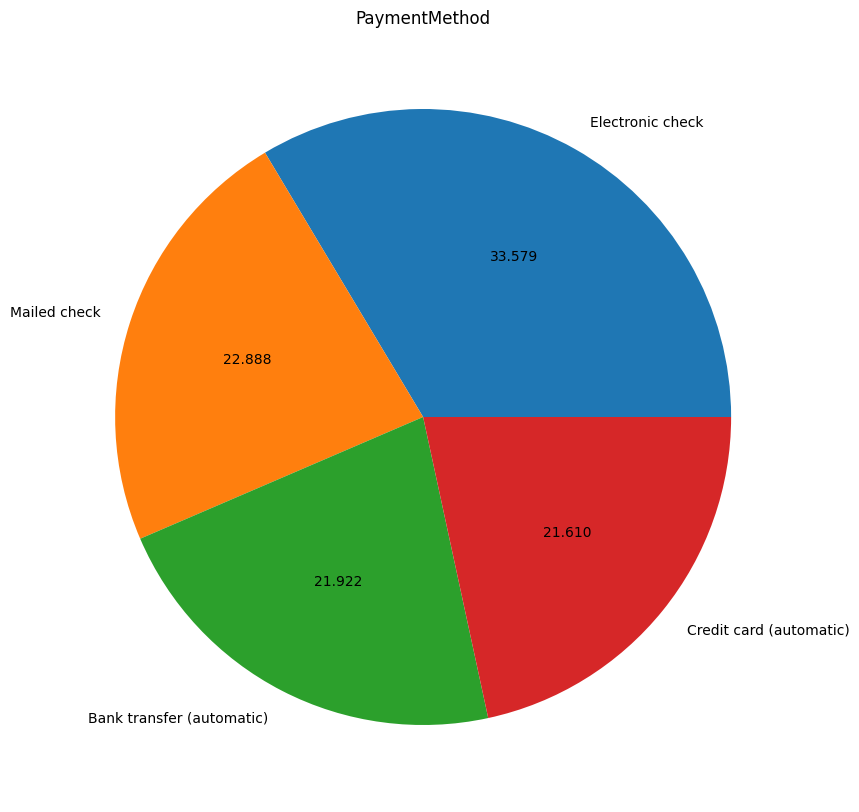

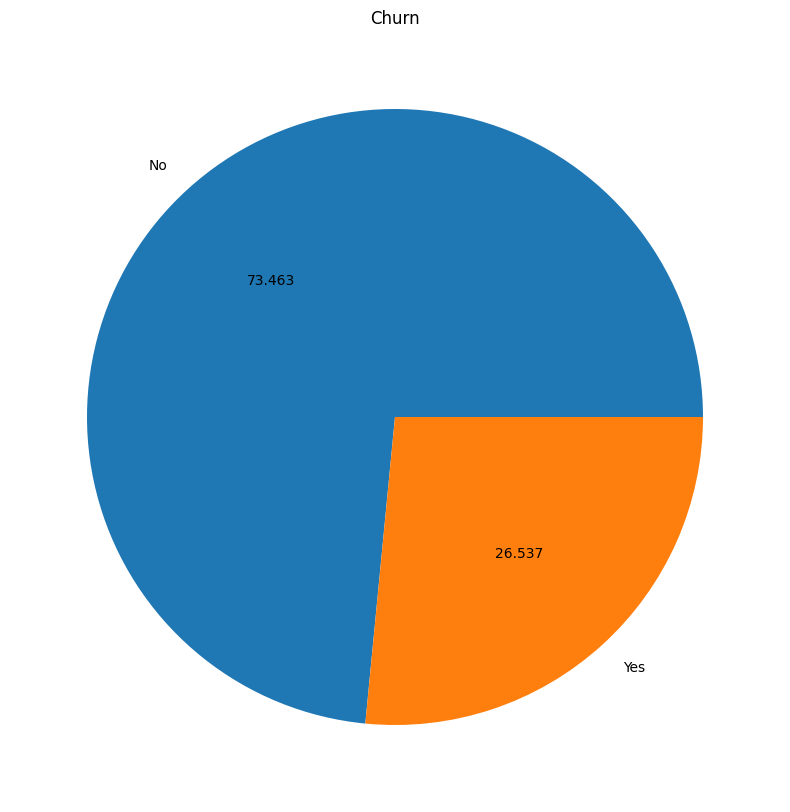

In [18]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in cols:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=False,
            autopct='%.3f')
    plt.show()

<Axes: xlabel='gender', ylabel='count'>

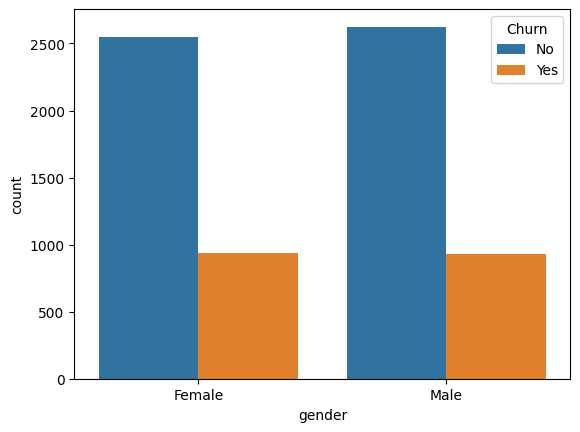

In [19]:
sns.countplot(x='gender',data=df, hue='Churn')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

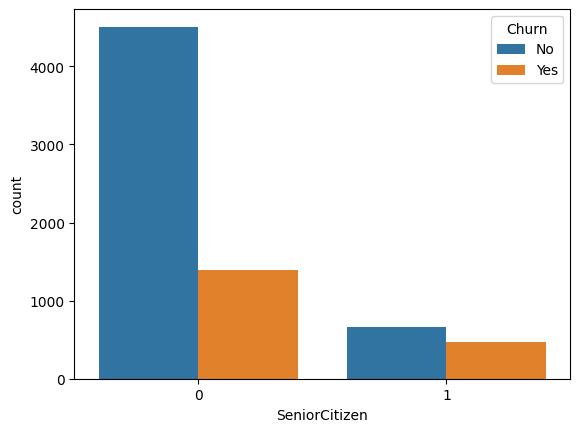

In [20]:
sns.countplot(x='SeniorCitizen',data=df, hue='Churn')

<Axes: xlabel='Partner', ylabel='count'>

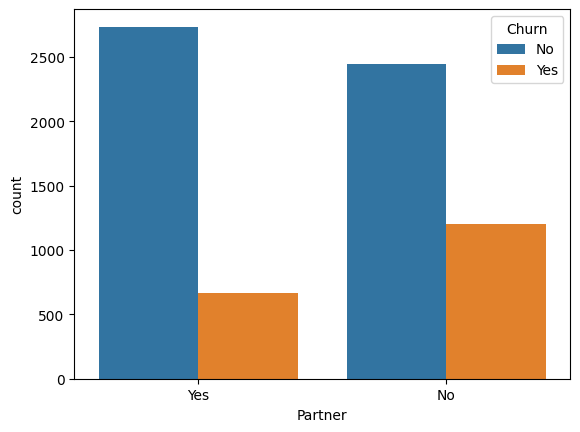

In [21]:
sns.countplot(x='Partner',data=df, hue='Churn')

<Axes: xlabel='Dependents', ylabel='count'>

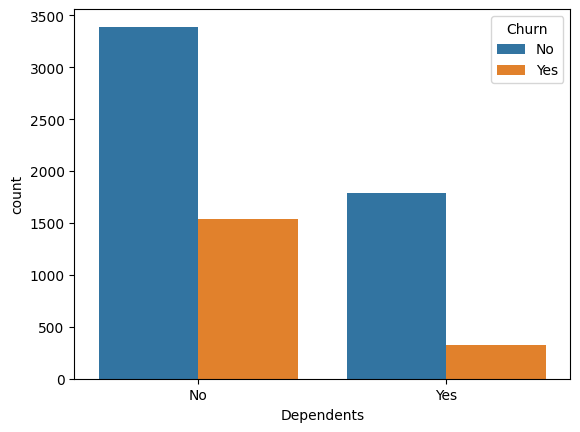

In [22]:
sns.countplot(x='Dependents',data=df, hue='Churn')

<Axes: xlabel='PhoneService', ylabel='count'>

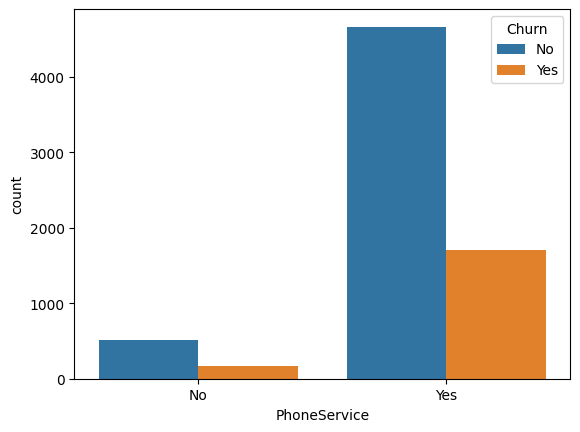

In [23]:
sns.countplot(x='PhoneService',data=df, hue='Churn')

<Axes: xlabel='MultipleLines', ylabel='count'>

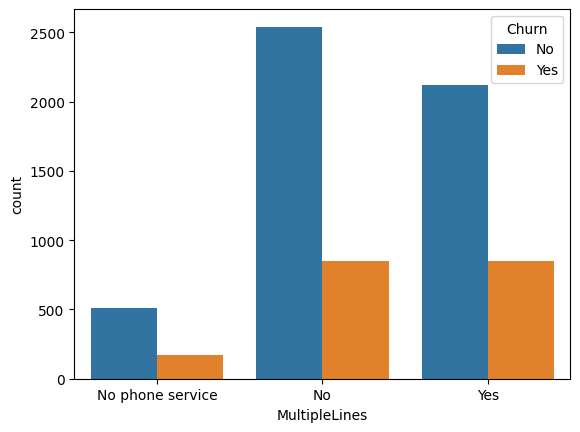

In [24]:
sns.countplot(x='MultipleLines',data=df, hue='Churn')

<Axes: xlabel='InternetService', ylabel='count'>

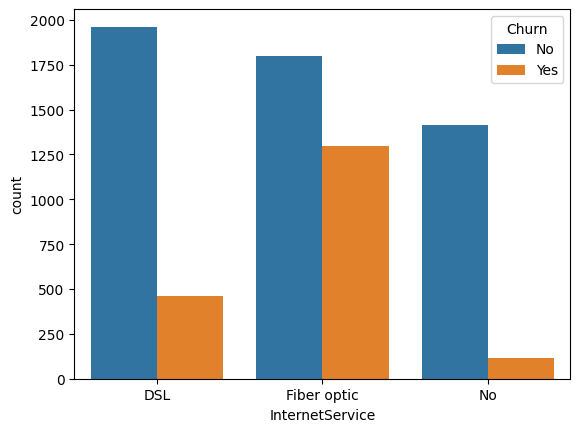

In [25]:
sns.countplot(x='InternetService',data=df, hue='Churn')

<Axes: xlabel='OnlineSecurity', ylabel='count'>

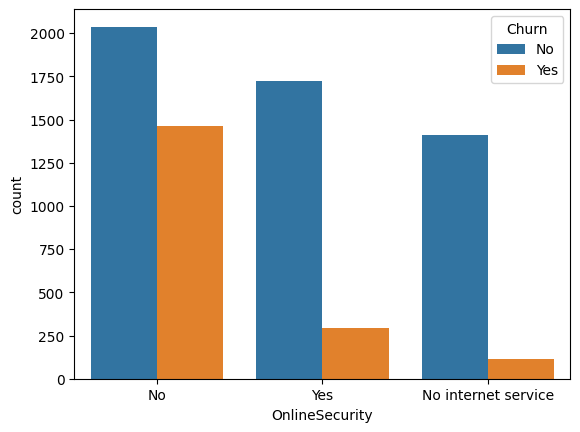

In [26]:
sns.countplot(x='OnlineSecurity',data=df, hue='Churn')

<Axes: xlabel='OnlineBackup', ylabel='count'>

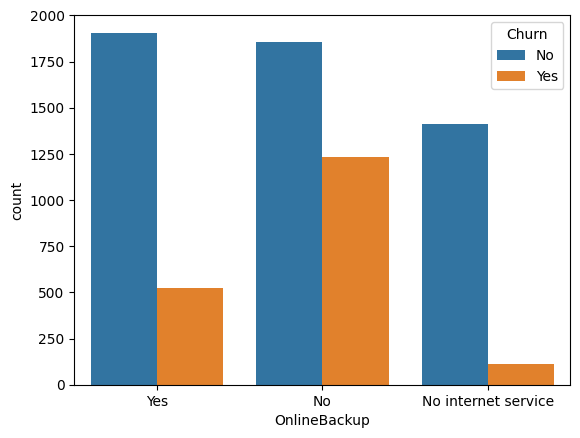

In [27]:
sns.countplot(x='OnlineBackup',data=df, hue='Churn')

<Axes: xlabel='DeviceProtection', ylabel='count'>

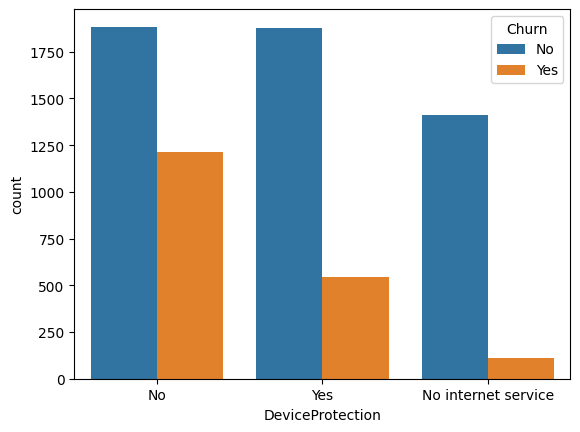

In [28]:
sns.countplot(x='DeviceProtection',data=df, hue='Churn')

<Axes: xlabel='TechSupport', ylabel='count'>

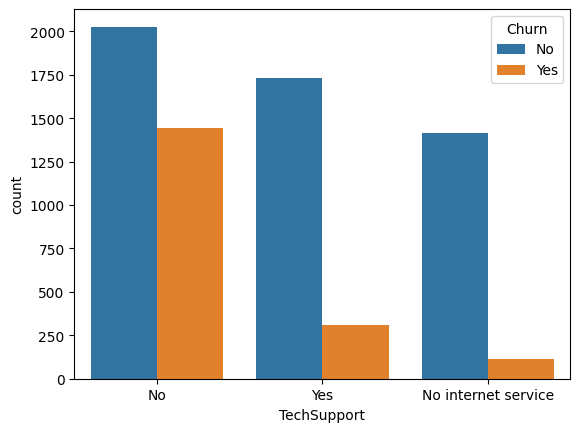

In [29]:
sns.countplot(x='TechSupport',data=df, hue='Churn')

<Axes: xlabel='StreamingTV', ylabel='count'>

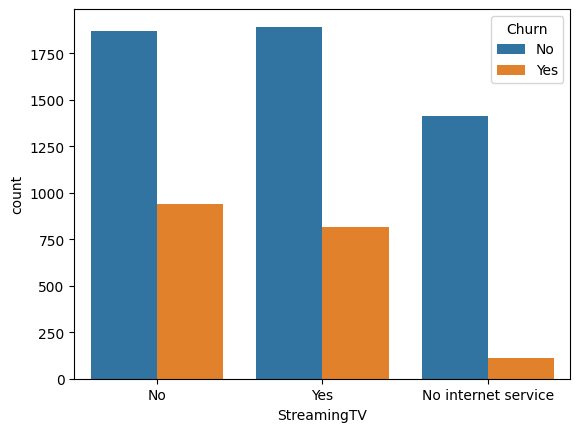

In [30]:
sns.countplot(x='StreamingTV',data=df, hue='Churn')

<Axes: xlabel='StreamingMovies', ylabel='count'>

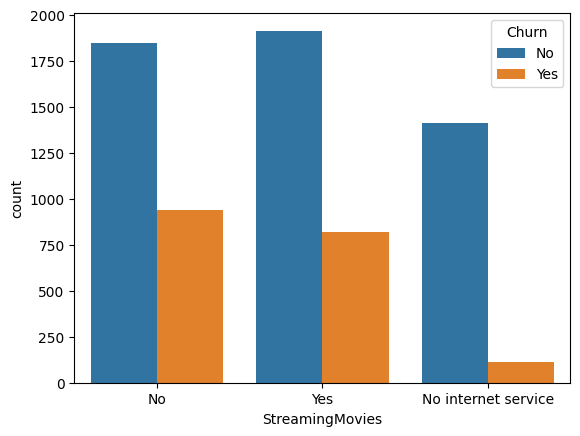

In [31]:
sns.countplot(x='StreamingMovies',data=df, hue='Churn')

<Axes: xlabel='Contract', ylabel='count'>

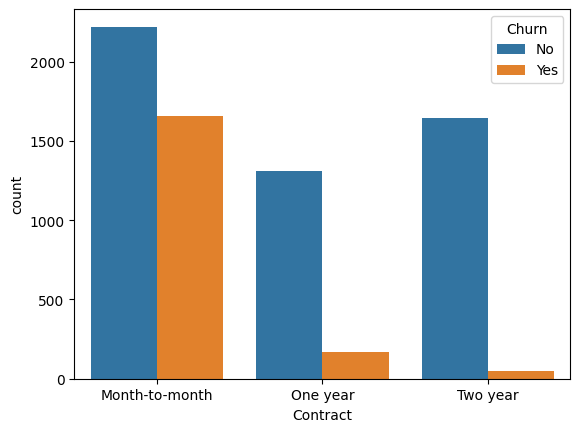

In [32]:
sns.countplot(x='Contract',data=df, hue='Churn')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

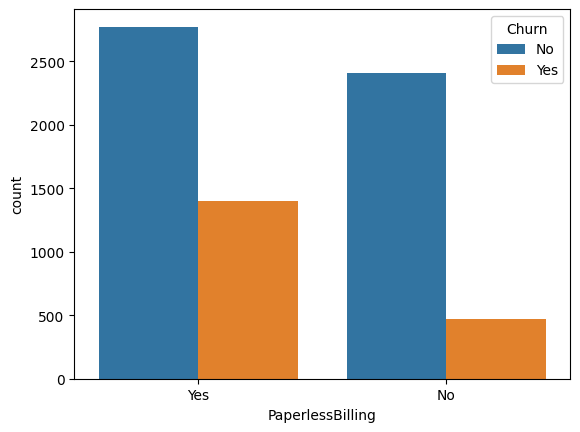

In [33]:
sns.countplot(x='PaperlessBilling',data=df, hue='Churn')

<Axes: xlabel='PaymentMethod', ylabel='count'>

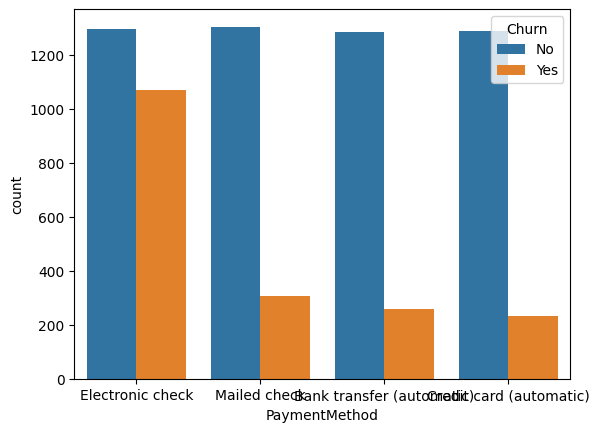

In [34]:
sns.countplot(x='PaymentMethod',data=df, hue='Churn')

In [35]:
dftempo = df[['tenure','MonthlyCharges', 'TotalCharges']]

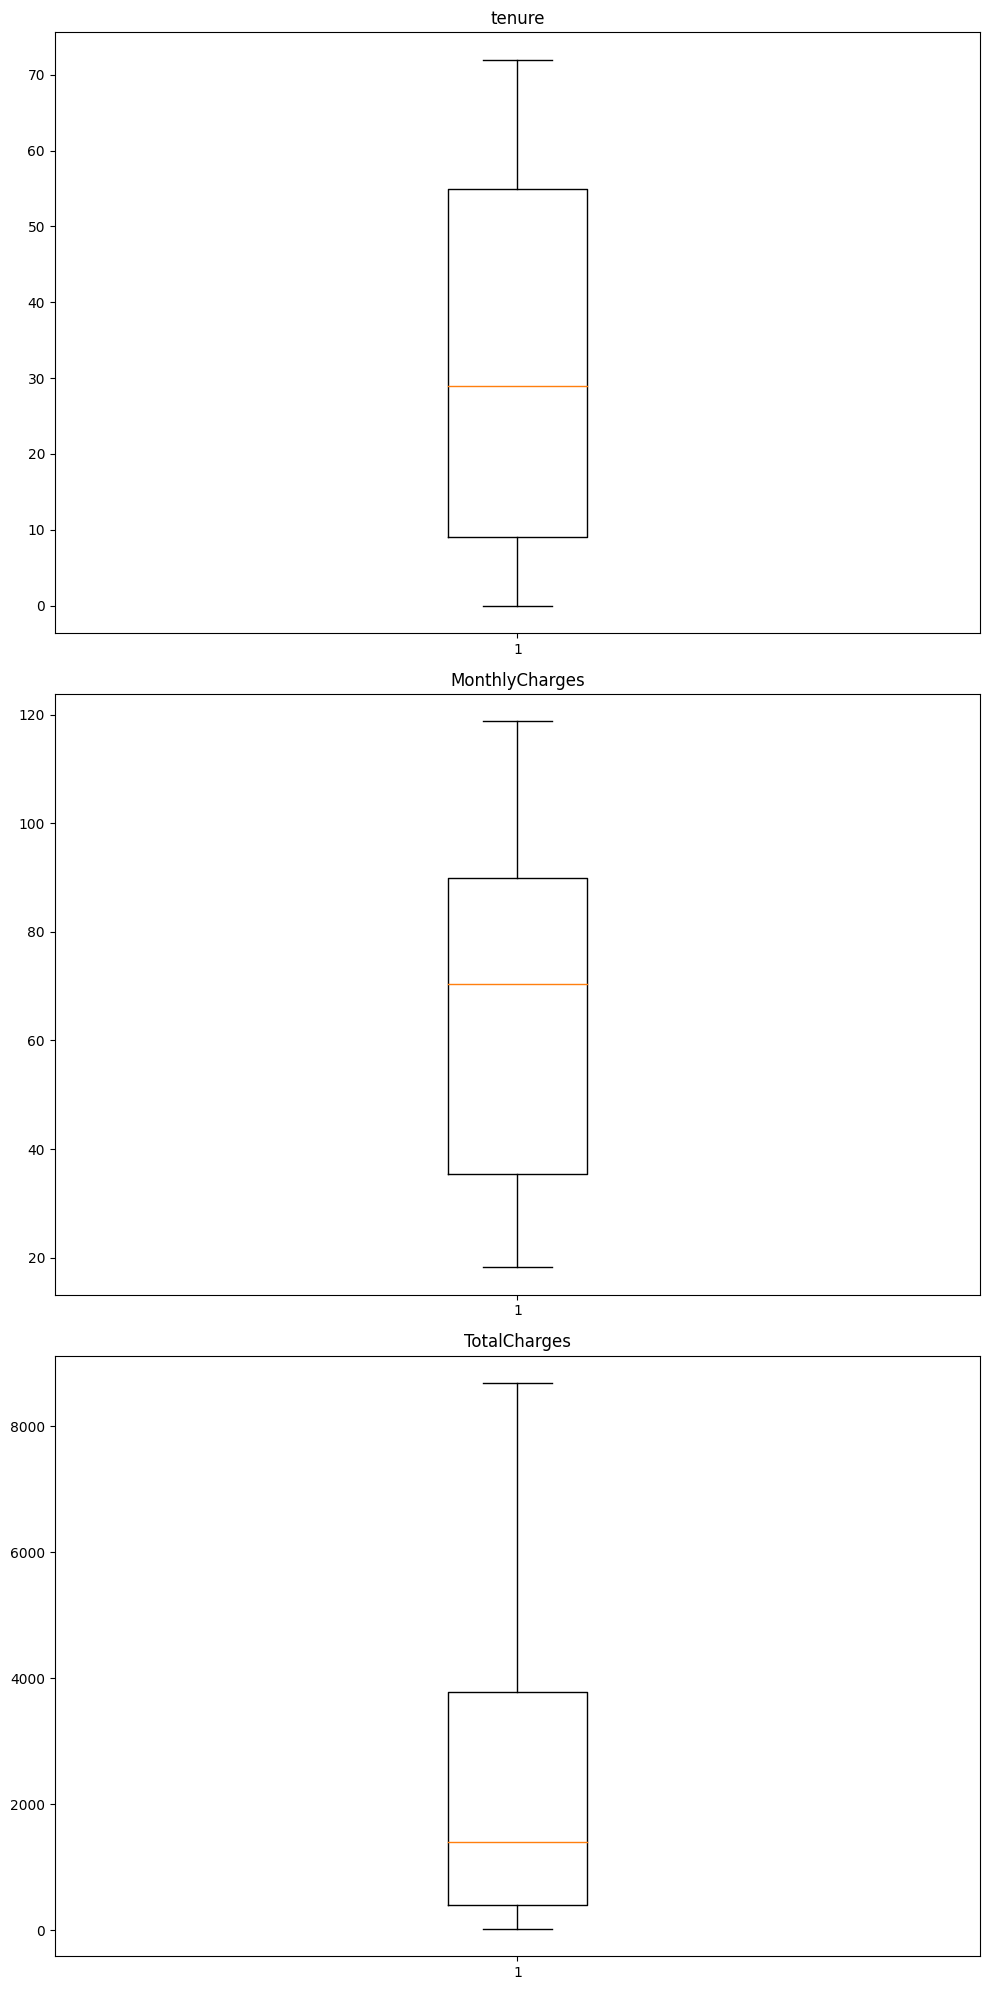

In [36]:
fig, axes = plt.subplots(nrows=len(dftempo.columns), figsize=(10, len(df.columns)))

for i, column in enumerate(dftempo.columns):
    axes[i].boxplot(dftempo[column])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']:
    df[col] = le.fit_transform(df[col])

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] =df.columns
df.astype(np.float64)
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,MonthlyCharges,22.27
5,PhoneService,15.18
4,tenure,14.61
18,TotalCharges,14.14
7,InternetService,4.38
14,Contract,4.17
13,StreamingMovies,3.26
12,StreamingTV,3.24
16,PaymentMethod,3.11
15,PaperlessBilling,2.89


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
# selected_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'PhoneService']]
# scaler = StandardScaler()
# std = scaler.fit_transform(selected_columns)
# pca = PCA(n_components=1)
# pca.fit(std)
# X_pca = pca.transform(std)

In [41]:
# X_pca[:10]

In [42]:
# df.drop('tenure', axis = 1,inplace =True)
# df.drop('MonthlyCharges', axis = 1,inplace =True)
# df.drop('TotalCharges', axis = 1,inplace =True)
# df['PCA']=X_pca
# df['PCA'].info()

In [43]:
# sns.distplot(df['PCA'])

In [44]:
df.corr(method ='pearson')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102396,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318810,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064531,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824761,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175430,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254307,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375361,-0.195525


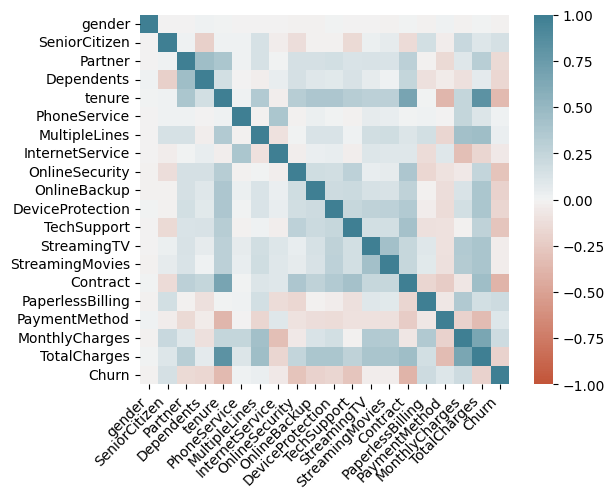

In [45]:
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
dfs=(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']])

In [48]:
x_temp=dfs
y_temp=df['Churn']

In [49]:
chi_scores=chi2(x_temp,y_temp)

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# **Feature Selection (Chi-square)**

<Axes: >

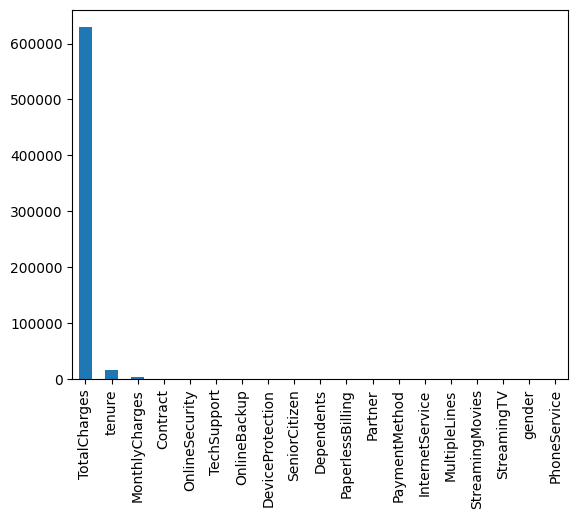

In [51]:
chi_values=pd.Series(chi_scores[0],index=x_temp.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

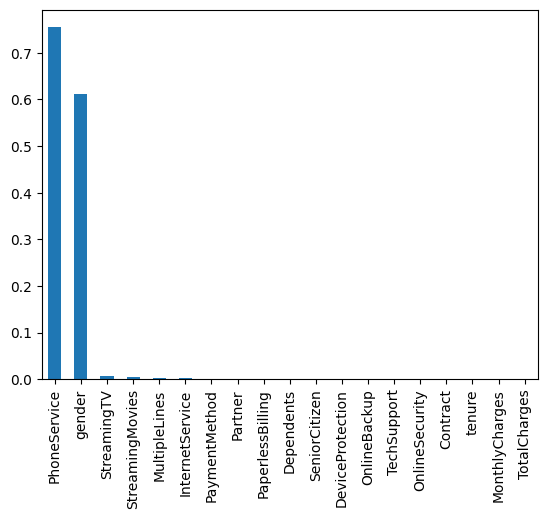

In [52]:
p_values=pd.Series(chi_scores[1],index=x_temp.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [53]:
X = df[['TotalCharges', 'SeniorCitizen',
        'tenure', 'InternetService',
        'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport',
        'Contract',
        'PaymentMethod', 'MonthlyCharges']]

y = df['Churn']

# **Smote to deal with variable imbalance**

In [54]:
smote = SMOTE(random_state=123)

In [55]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X,y)

In [56]:
y_resampled_smote.notnull().sum()

10348

In [57]:
X_resampled_smote.notnull().sum()

TotalCharges        10348
SeniorCitizen       10348
tenure              10348
InternetService     10348
OnlineSecurity      10348
OnlineBackup        10348
DeviceProtection    10348
TechSupport         10348
Contract            10348
PaymentMethod       10348
MonthlyCharges      10348
dtype: int64

# **Modelling**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_smote_train,X_smote_test,y_smote_train,y_smote_test = train_test_split(X_resampled_smote,y_resampled_smote,test_size=0.2,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smote_train)
X_train_scaledsmote = scaler.transform(X_smote_train)
X_test_scaledsmote = scaler.transform(X_smote_test)

# **Accuracy, confusion matrix, and classification report with variable imbalancing**

In [70]:
classifier = LogisticRegression(random_state = 42)
print(classifier.fit(X_smote_train, y_smote_train))

LogisticRegression(random_state=42)


In [74]:
Y_predsmote = classifier.predict(X_smote_test)

In [75]:
cm = confusion_matrix(y_smote_test, Y_predsmote)
print(cm)

[[779 242]
 [165 884]]


In [76]:
cr=classification_report(y_smote_test, Y_predsmote)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1021
           1       0.79      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [77]:
accuracy_score(y_smote_test,Y_predsmote)*100

80.33816425120773

# **Accuracy, confusion matrix, and classification report WITHOUT variable imbalancing**

In [79]:
import warnings
warnings.filterwarnings('ignore')
logreg = LogisticRegression()

param_grid = {'C': [0.001 ,0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver' : ['liblinear'],
              'max_iter' : [100, 500, 1000]
              }

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7932135973697139


In [80]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[927 109]
 [155 218]]


In [81]:
cr=classification_report(y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [82]:
accuracy_score(y_test,Y_pred)*100

81.26330731014905